# 👻 회귀 (Regression)

## 👽 1. 상관분석과 회귀분석


### 1.1 상관분석 (Correlation Analysis)

> 독립변수와 종속변수 간의 관계의 강도,  
즉 __얼마나 밀접하게 관련돼 있는지__ 를 분석하는 것  
상관성 유무만 확인할 뿐, 인과관계는 분석X



핵심은 **상관계수** 구하기  
* 상관계수(r) : 독립변수와 종속변수의 관계 정도를 -1과 1 사이로 정량화한 것  

<img src="https://mania.kr/g2/data/cheditor5/2002/view_thumbnail/mania-done-20200226124719_khlwxfkv.jpg" width ="600" height="320" alt="상관 계수" title="상관 계수">  
* 선형적 상관성이 클수록 상관관계가 강하다고 표현함  


### 1.2 회귀분석 (Regression Analysis)
> 독립변수와 종속변수의 상관 관계를 함수식으로 규명하는 것

결정계수(r^2) : 독립변수를 통한 종속변수 __예측이 얼마나 의미 있는 정보인지__ 를 판별함  
결정계수가 0.65보다 크거나 같으면 의미 있는 회귀식이라고 함  



___



## 👽 2. 선형 회귀
> 선형이라는 건 독립변수가 __1차항__ 으로 되어 있다는 의미

$$ f(x+y)=f(x)+f(y) $$
$$ f(ax)=af(x) $$

선형회귀식을 구할 때는 일반적으로 __최소제곱법__ 을 이용함   

__최소제곱법__ : 주어진 독립변수에 대해 어떤 함수식으로 예측한 __결과값과 실제값의 차이__ 를 __제곱해서 모두 더한 값__ 이 __최소__ 가 되는 함수식이 가장 타당한 회귀식이라는 이론  
  
독립변수의 수에 따라 `단순선형회귀`와 `다중선형회귀`로 구분함 


### 2.1 단순선형회귀(simple linear regression)

In [1]:
'''
단순선형회귀

키와 몸무게에 대한 데이터로

새로운 키가 주어졌을 때 몸무게 예측
'''
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#데이터 읽기
url='https://raw.githubusercontent.com/lmyourGenie/MachineLearning_Study/master/basic_concept/resource/data1.csv'
df=pd.read_csv(url)
df.head()

,height,weight
0,163.28,45.07
1,172.66,56.88
2,166.83,50.60
3,160.40,44.35
4,174.13,60.98


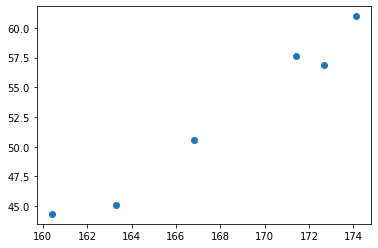

In [3]:
X=np.array(df['height'])
y=np.array(df['weight'])
plt.scatter(X,y)
plt.show()

In [4]:
#데이터 학습
line_fitter = LinearRegression()
line_fitter.fit(X.reshape(-1,1), y)

LinearRegression()

In [5]:
line_fitter.predict([[172.03]])  #키가 주어지면 몸무게를 알려줌

array([57.43932609])

In [6]:
line_fitter.coef_ #기울기

array([1.24161862])

In [7]:
line_fitter.intercept_ #절편

-156.15632437241558

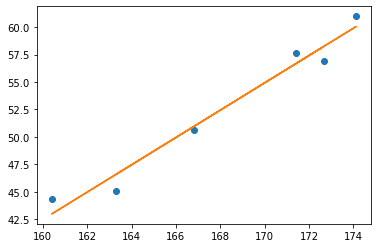

In [8]:
plt.plot(X, y, 'o')
plt.plot(X,line_fitter.predict(X.reshape(-1,1)))
plt.show()

<br/>

~~하쥐만 우리가 사는 세상은 단순회귀로 풀릴 만큼 그렇게 단순하지 않다. 고려해야 하는 변수 X가 하나가 아니라는 뜻😭~~  
<br/>


  

### 2.2 다중선형회귀(multiple linear regression)


In [9]:
'''
다중선형회귀

'''
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [10]:
#데이터 직접 추가
data = {'x1' : [13, 18, 17, 20, 22, 21],  
       'x2' : [9, 7, 17, 11, 8, 10],
       'y' : [20, 22, 30, 27, 35, 32]}
# data 변수 안에 dictionary형태의 x1, x2, y key 이름을 가진 데이터를 생성

data = pd.DataFrame(data)                 
# data변수 안에 저장된 데이터를 pandas.DataFrame 함수를 통해 2차원의 수정 가능한 테이블 형태의 구조로 변경 후 data 변수에 저장

X = data[['x1', 'x2']]                   
# 독립변수들을 따로 변수에 저장. "data"데이터 프레임 안에 독립변수 "x1"과 "x2"를 "X"라는 변수에 저장.

y = data['y']
data

,x1,x2,y
0,13,9,20
1,18,7,22
2,17,17,30
3,20,11,27
4,22,8,35
5,21,10,32


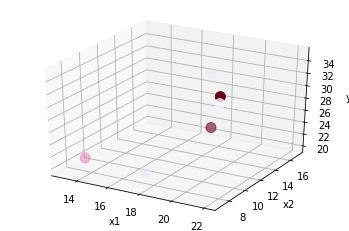

In [11]:
#3차원 그래프로 표현하기

from mpl_toolkits.mplot3d import Axes3D
xmin, xmax = 0, 6
cmin = 0
n=6
color = (xmax - xmin) * np.random.rand(n) + cmin

x1=data['x1']
x2=data['x2']
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d') #3D axes 생성
ax.scatter(x1, x2, y, c=color, s=100, cmap='PuRd') #c:color어레이의 값들, s:크기
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()

In [12]:
#데이터 학습
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)
#하나의 a값에 두개의 b값이 출력됨

a value =  -7.35920177383591
b value =  [1.5443459  0.62472284]


In [13]:
# 적합도 검증 - 잔차
residuals = y-prediction
residuals.describe()

count    6.000000e+00
mean    -4.736952e-15
std      2.622371e+00
min     -3.399667e+00
25%     -1.987805e+00
50%      5.828714e-01
75%      1.415327e+00
max      3.385809e+00
Name: y, dtype: float64

In [14]:
# 적합도 검증 - 결정계수 r^2
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.7969440176685233


In [15]:
#성능 평가
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X =pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

# RMSE가 약 2.39로 오차 작음

score =  0.7969440176685233
Mean_Squared_Error =  5.730691056910563
RMSE =  2.393886182948254



  
---
  

  

## 👽 3. 로지스틱 회귀
> 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법  
__범주형 변수를 예측하는 모델__   
종속변수가 예/아니오, 1/0, 합격/불합격 처럼 카테고리로 딱 딱 나눠질 때는 로지스틱 회귀를 사용함

특히 예/아니오처럼 종속변수가 2가지 범주에 속할 때 *이진형 로지스틱 회귀모델*이라고함  

실제로는 예측을 의미하는 회귀분석보다는 분류 모델에 가까움  
<br/>

출력값이 [0,1]을 경계로 결정되는 로지스틱 함수를 회귀식으로 사용함  
<br/>

독립변수 x, 임의의 계수 β0, β1에 대해 로지스틱 함수를 표현하면  


$$ p\left(x\right)_{\beta _0,\beta _1}=\frac{e^{_{\beta _0+\beta _1x}}}{1+e^{_{\beta _0+\beta _1x}}} $$

로지스틱 회귀 분석의 1차 목표는 회귀식을 결정하는 계수의 값을 알아내는 것!  

일반적으로 __최대가능도법__ (maximum likelihood method , MLE)을 사용함  
<br/>


__최대가능도법__ : 관찰된 데이터세트가 가장 들어 맞는(likely) 회귀식을 찾는 방법  
가능도함수를 최대로 하는 확률을 찾는 방법  

① 두 개의 범주 y=1, y=0에 대한 확률을 다음과 같이 정의  


$$
P\left(y=1|\ x;\ \beta _0,\beta _1\right)=p\left(x\right)_{\beta _0,\beta _1}\\ P\left(y=0|\ x;\ \beta _0,\beta _1\right)=1-p\left(x\right)_{\beta _0,\beta _1}
$$

② 학습 데이터세트를 적용하여 가능도(likelihood) 구하기
$$
\mathcal{L}(\beta _0,\beta _1)=\prod _{i=1}^n\overline {P}\left(y^i\ |\ x^i;\ \beta _0,\beta _1\right)\\ =\prod _{i=1}^n\left(p\left(x^i\right)_{\beta _0,\beta _1}\right)^{y^i}\left(1-p\left(x^i\right)_{\beta _0,\beta _1}\right)^{1-y^i}
$$  

<br/>


③ 로그 가능도(log likelihood) 구하기
$$
\ln\mathcal{L}\left( \beta _0,\beta _1\right)\\ =\prod _{i=1}^n\left(y^i\ln p\left(x^i\right)_{\beta _0,\beta _1}+\left(1-y^i\right)\ln \left(1-p\left(x^i\right)_{\beta _0,\beta _1}\right)\right)\\ 
$$  

<br/>


④ 로그 가능도를 최대로 하는 β값 찾기 위해 델타 룰 적용
$$
 \frac{\partial ln\mathcal{L}(\beta _0,\beta _1)}{\partial \beta _0}\\ =\left(y^i\frac{1}{p\left(x^i\right)_{\beta _0,\beta _1}}-\left(1-y^i\right)\frac{1}{1-p\left(x^i\right)_{\beta _0,\beta _1}}\right)\frac{\partial p\left(x^i\right)_{\beta _0,\beta _1}}{\partial \beta _0}\\ =y^i-p\left(x^i\right)_{\beta _0,\beta _1}
$$  
<br/>

$$
\frac{\partial ln\mathcal{L} (\beta _0,\beta _1)}{\partial \beta _1}\\ =\left(y^i\frac{1}{p\left(x^i\right)_{\beta _0,\beta _1}}-\left(1-y^i\right)\frac{1}{1-p\left(x^i\right)_{\beta _0,\beta _1}}\right)\frac{\partial p\left(x^i\right)_{\beta _0,\beta _1}}{\partial \beta _1}\\ =\left(y^i-p\left(x^i\right)_{\beta _0,\beta _1}\right)x^i
$$  

<br/>


⑤ 학습률 α를 적용하여 계수 β 구하기
$$
\beta _0\ :\ \beta _0+\alpha \frac{\partial \ln \mathcal{L}\left(\beta _0,\beta _1\right)}{\partial \beta _0}\\ =\beta _0+\alpha \left(y^i-p\left(x^i\right)_{\beta _0,\beta _1}\right)
$$  
<br/>

$$
\beta _1\ :\ \beta _1+\alpha \frac{\partial \ln \mathcal{L}\left(\beta _0,\beta _1\right)}{\partial \beta _1}\\ =\beta _1+\alpha \left(y^i-p\left(x^i\right)_{\beta _0,\beta _1}\right)
$$  
<br/>


---

<br/>


* 참고

| 라이브러리 | 설명 |
|:---: | :---: |
| Pandas | 행과 열로 이루어진 데이터 객체를 만들어 다룰 수 있게 되며 보다 안정적으로 대용량의 데이터들을 처리하는데 매우 편리한 도구 |
| numpy | 다차원 배열을 처리하는데 필요한 여러 유용한 기능을 제공 |
| sklearn | 머신러닝 교육을 위한 파이썬 패키지 |
| train_test_split | 딥러닝을 제외하고도 다양한 기계학습과 데이터 분석 툴을 제공하는 scikit-learn 패키지 중 model_selection에 데이터 분할을 위한 함수 |
| statsmodels | 검정 및 추정 , 회귀분석, 시계열분석등의 다양한 통계분석 기능을 제공 |

<br/>
<br/>
<br/>


* 출처
파이썬을 이용한 데이터 분석